# **Entri DSML Final Project using ML**  
**MOVIE RECOMMENDATION ENGINE USING CONTENT-BASED FILTERING**

---

## **Introduction**  
In today's rapidly growing digital entertainment landscape, where thousands of new movies are released each year, users often struggle to find what to watch next. Platforms like Netflix and Amazon Prime solve this with recommendation systems that deliver personalized suggestions.

This project aims to build a simplified version of such a system using content-based filtering. Unlike collaborative filtering, which relies on user behavior, content-based methods recommend movies based on their features — such as plot, genre, and cast.

Using real-world movie data, we explore how feature engineering, natural language processing, and unsupervised learning can be combined to recommend similar movies. This not only provides a hands-on application of machine learning but also showcases how movie metadata can drive user satisfaction.

---

## **Aim and Objectives**  
The aim of this project is to design a movie recommendation system that leverages content similarities to suggest films related to a selected movie.

**Key Objectives:**
- Perform exploratory data analysis to extract trends in genres, cast frequency, and plot structures.
- Clean and preprocess the dataset, including handling missing values and removing duplicates.
- Apply NLP techniques to vectorize plot summaries.
- Encode genre and cast into machine-readable formats.
- Treat outliers in plot length to ensure fair similarity scoring.
- Combine all features into a single content profile and compute cosine similarity.
- Develop a recommendation function that returns top-N similar movies.
- Add interactive features like fuzzy search correction and input loops for enhanced user experience.

---

## **Project Overview**  
This project uses a subset of the **Rotten Tomatoes Movies Dataset** containing around 10,000 movie records. Each movie has metadata including title, plot summary (`movie_info`), `genre`, `cast`, and `rating`. After a thorough data cleaning process — including duplicate removal and outlier treatment of long plot summaries — three major fields were selected for modeling: `movie_info`, `genre`, and `cast`.

Plot summaries were vectorized using **TF-IDF**, while genre and cast were encoded appropriately. These content vectors were then combined and compared using **cosine similarity**, allowing us to recommend movies with similar characteristics.

The project demonstrates an application of **unsupervised learning** — a concept not covered in the core curriculum — and provides a real-world perspective on building intelligent recommendation engines. It also incorporates a user-friendly interface with fuzzy search correction, genre display, and search-loop capability.

The final system is scalable, insightful, and offers a solid foundation for extending into hybrid or personalized recommendation systems in the future.

# **Exploratory Data Analysis(EDA) and Data Cleaning**  

In [275]:
# importing libraries
import numpy as np
import pandas as pd

In [277]:
# loading dataset
csv_dataset ="Rotten_Tomatoes_Movies.csv"
df= pd.read_csv(csv_dataset)

In [278]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16638 entries, 0 to 16637
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   movie_title         16638 non-null  object 
 1   movie_info          16614 non-null  object 
 2   critics_consensus   8309 non-null   object 
 3   rating              16638 non-null  object 
 4   genre               16621 non-null  object 
 5   directors           16524 non-null  object 
 6   writers             15289 non-null  object 
 7   cast                16354 non-null  object 
 8   in_theaters_date    15823 non-null  object 
 9   on_streaming_date   16636 non-null  object 
 10  runtime_in_minutes  16483 non-null  float64
 11  studio_name         16222 non-null  object 
 12  tomatometer_status  16638 non-null  object 
 13  tomatometer_rating  16638 non-null  int64  
 14  tomatometer_count   16638 non-null  int64  
 15  audience_rating     16386 non-null  float64
 16  audi

In [281]:
print("Rows, Columns",df.shape)

Rows, Columns (16638, 17)


In [283]:
df.describe()

,runtime_in_minutes,tomatometer_rating,tomatometer_count,audience_rating,audience_count
count,16483.000000,16638.000000,16638.000000,16386.000000,1.638600e+04
mean,102.391494,60.466522,56.607104,60.470829,1.524797e+05
std,25.028011,28.587230,66.383800,20.462368,1.817736e+06
min,1.000000,0.000000,5.000000,0.000000,5.000000e+00
25%,90.000000,38.000000,12.000000,45.000000,8.642500e+02
50%,99.000000,66.000000,28.000000,62.000000,4.876500e+03
75%,111.000000,86.000000,76.000000,77.000000,2.875200e+04
max,2000.000000,100.000000,497.000000,100.000000,3.579764e+07


In [285]:
df.head()

,movie_title,movie_info,critics_consensus,rating,genre,directors,writers,cast,in_theaters_date,on_streaming_date,runtime_in_minutes,studio_name,tomatometer_status,tomatometer_rating,tomatometer_count,audience_rating,audience_count
0,Percy Jackson & the Olympians: The Lightning T...,A teenager discovers he's the descendant of a ...,Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,Craig Titley,"Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,2010-06-29,83.0,20th Century Fox,Rotten,49,144,53.0,254287.0
1,Please Give,Kate has a lot on her mind. There's the ethics...,Nicole Holofcener's newest might seem slight i...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",2010-04-30,2010-10-19,90.0,Sony Pictures Classics,Certified Fresh,86,140,64.0,11567.0
2,10,Blake Edwards' 10 stars Dudley Moore as George...,NaN,R,"Comedy, Romance",Blake Edwards,Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",1979-10-05,1997-08-27,118.0,Waner Bros.,Fresh,68,22,53.0,14670.0
3,12 Angry Men (Twelve Angry Men),"A Puerto Rican youth is on trial for murder, a...",Sidney Lumet's feature debut is a superbly wri...,NR,"Classics, Drama",Sidney Lumet,Reginald Rose,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",1957-04-13,2001-03-06,95.0,Criterion Collection,Certified Fresh,100,51,97.0,105000.0
4,"20,000 Leagues Under The Sea","This 1954 Disney version of Jules Verne's 20,0...","One of Disney's finest live-action adventures,...",G,"Action & Adventure, Drama, Kids & Family",Richard Fleischer,Earl Felton,"James Mason, Kirk Douglas, Paul Lukas, Peter L...",1954-01-01,2003-05-20,127.0,Disney,Fresh,89,27,74.0,68860.0


In [287]:
df.tail()

,movie_title,movie_info,critics_consensus,rating,genre,directors,writers,cast,in_theaters_date,on_streaming_date,runtime_in_minutes,studio_name,tomatometer_status,tomatometer_rating,tomatometer_count,audience_rating,audience_count
16633,Zoot Suit,"Based on a 1940s Los Angeles murder trial, thi...",NaN,R,"Drama, Musical & Performing Arts",Luis Valdez,Luis Valdez,"Daniel Valdez, Edward James Olmos, Charles Aid...",1981-10-02,2003-05-27,104.0,MCA Universal Home Video,Rotten,56,9,74.0,1192.0
16634,Zootopia,The modern mammal metropolis of Zootopia is a ...,The brilliantly well-rounded Zootopia offers a...,PG,"Action & Adventure, Animation, Comedy","Byron Howard, Rich Moore, Jared Bush","Jared Bush, Phil Johnston","Ginnifer Goodwin, Jason Bateman, Idris Elba, J...",2016-03-04,2016-06-07,108.0,Walt Disney Animation Studios,Certified Fresh,97,279,92.0,100946.0
16635,Zorba the Greek,If ever there was a role that Anthony Quinn wa...,NaN,NR,"Action & Adventure, Art House & International,...",NaN,NaN,"Anthony Quinn, Alan Bates, Irene Papas, Lila K...",1964-12-17,2004-08-03,142.0,Fox,Fresh,78,9,87.0,7126.0
16636,Zulu,"Filmed on a grand scale, Zulu is a rousing rec...",NaN,PG,"Classics, Drama","Cy Endfield, Cyril Endfield","Cy Endfield, John Prebble","Stanley Baker, Jack Hawkins, Ulla Jacobsson, J...",1964-06-17,2001-02-02,139.0,Paramount Pictures,Fresh,95,21,91.0,30170.0
16637,Zulu Dawn,"A prequel to Zulu, Zulu Dawn depicts the event...",NaN,PG,"Action & Adventure, Art House & International,...",Douglas Hickox,"Cy Endfield, Anthony Storey","Burt Lancaster, Peter O'Toole, Simon Ward, Joh...",1979-12-14,2005-09-27,117.0,Tango Entertainment,Rotten,57,7,62.0,4464.0


In [289]:
print(df.columns.tolist())

['movie_title', 'movie_info', 'critics_consensus', 'rating', 'genre', 'directors', 'writers', 'cast', 'in_theaters_date', 'on_streaming_date', 'runtime_in_minutes', 'studio_name', 'tomatometer_status', 'tomatometer_rating', 'tomatometer_count', 'audience_rating', 'audience_count']


In [291]:
df.isna().sum()

movie_title              0
movie_info              24
critics_consensus     8329
rating                   0
genre                   17
directors              114
writers               1349
cast                   284
in_theaters_date       815
on_streaming_date        2
runtime_in_minutes     155
studio_name            416
tomatometer_status       0
tomatometer_rating       0
tomatometer_count        0
audience_rating        252
audience_count         252
dtype: int64

In [293]:
#Droping columns not required.
df_cleaned = df.drop(columns = ['critics_consensus', 'in_theaters_date','on_streaming_date', 'runtime_in_minutes', 'studio_name', 'tomatometer_status','tomatometer_rating', 'tomatometer_count','audience_rating','audience_count','writers'	]) 

In [295]:
df_cleaned.head()

,movie_title,movie_info,rating,genre,directors,cast
0,Percy Jackson & the Olympians: The Lightning T...,A teenager discovers he's the descendant of a ...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,"Logan Lerman, Brandon T. Jackson, Alexandra Da..."
1,Please Give,Kate has a lot on her mind. There's the ethics...,R,Comedy,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R..."
2,10,Blake Edwards' 10 stars Dudley Moore as George...,R,"Comedy, Romance",Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert ..."
3,12 Angry Men (Twelve Angry Men),"A Puerto Rican youth is on trial for murder, a...",NR,"Classics, Drama",Sidney Lumet,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G...."
4,"20,000 Leagues Under The Sea","This 1954 Disney version of Jules Verne's 20,0...",G,"Action & Adventure, Drama, Kids & Family",Richard Fleischer,"James Mason, Kirk Douglas, Paul Lukas, Peter L..."


In [297]:
df_cleaned.isna().sum()

movie_title      0
movie_info      24
rating           0
genre           17
directors      114
cast           284
dtype: int64

In [299]:
#Substituting missing values with N.A
df_cleaned['movie_info'] = df_cleaned['movie_info'].fillna("N.A")
df_cleaned['genre'] = df_cleaned['genre'].fillna("N.A")
df_cleaned['directors'] = df_cleaned['directors'].fillna("N.A")
df_cleaned['cast'] = df_cleaned['cast'].fillna("N.A")

In [301]:
df_cleaned.isna().sum()

movie_title    0
movie_info     0
rating         0
genre          0
directors      0
cast           0
dtype: int64

In [303]:
df_cleaned.head()

,movie_title,movie_info,rating,genre,directors,cast
0,Percy Jackson & the Olympians: The Lightning T...,A teenager discovers he's the descendant of a ...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,"Logan Lerman, Brandon T. Jackson, Alexandra Da..."
1,Please Give,Kate has a lot on her mind. There's the ethics...,R,Comedy,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R..."
2,10,Blake Edwards' 10 stars Dudley Moore as George...,R,"Comedy, Romance",Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert ..."
3,12 Angry Men (Twelve Angry Men),"A Puerto Rican youth is on trial for murder, a...",NR,"Classics, Drama",Sidney Lumet,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G...."
4,"20,000 Leagues Under The Sea","This 1954 Disney version of Jules Verne's 20,0...",G,"Action & Adventure, Drama, Kids & Family",Richard Fleischer,"James Mason, Kirk Douglas, Paul Lukas, Peter L..."


In [305]:
#Cleaning duplicate rows
print("Duplicate rows:", df_cleaned.duplicated().sum())

Duplicate rows: 1


In [307]:
# Remove duplicates
df_cleaned = df_cleaned.drop_duplicates()
# Confirm removal
print("Duplicate rows after removal:", df_cleaned.duplicated().sum())

Duplicate rows after removal: 0


In [309]:
#Index Reset
df_cleaned.reset_index(drop=True, inplace=True)
print("Cleaned data:", df_cleaned.shape)

Cleaned data: (16637, 6)


In [311]:
df_cleaned

,movie_title,movie_info,rating,genre,directors,cast
0,Percy Jackson & the Olympians: The Lightning T...,A teenager discovers he's the descendant of a ...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,"Logan Lerman, Brandon T. Jackson, Alexandra Da..."
1,Please Give,Kate has a lot on her mind. There's the ethics...,R,Comedy,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R..."
2,10,Blake Edwards' 10 stars Dudley Moore as George...,R,"Comedy, Romance",Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert ..."
3,12 Angry Men (Twelve Angry Men),"A Puerto Rican youth is on trial for murder, a...",NR,"Classics, Drama",Sidney Lumet,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G...."
4,"20,000 Leagues Under The Sea","This 1954 Disney version of Jules Verne's 20,0...",G,"Action & Adventure, Drama, Kids & Family",Richard Fleischer,"James Mason, Kirk Douglas, Paul Lukas, Peter L..."
...,...,...,...,...,...,...
16632,Zoot Suit,"Based on a 1940s Los Angeles murder trial, thi...",R,"Drama, Musical & Performing Arts",Luis Valdez,"Daniel Valdez, Edward James Olmos, Charles Aid..."
16633,Zootopia,The modern mammal metropolis of Zootopia is a ...,PG,"Action & Adventure, Animation, Comedy","Byron Howard, Rich Moore, Jared Bush","Ginnifer Goodwin, Jason Bateman, Idris Elba, J..."
16634,Zorba the Greek,If ever there was a role that Anthony Quinn wa...,NR,"Action & Adventure, Art House & International,...",N.A,"Anthony Quinn, Alan Bates, Irene Papas, Lila K..."
16635,Zulu,"Filmed on a grand scale, Zulu is a rousing rec...",PG,"Classics, Drama","Cy Endfield, Cyril Endfield","Stanley Baker, Jack Hawkins, Ulla Jacobsson, J..."


# **Data Visualizations**  

In [314]:
# importing libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

**1. Top 10 Genres (Bar Chart)**

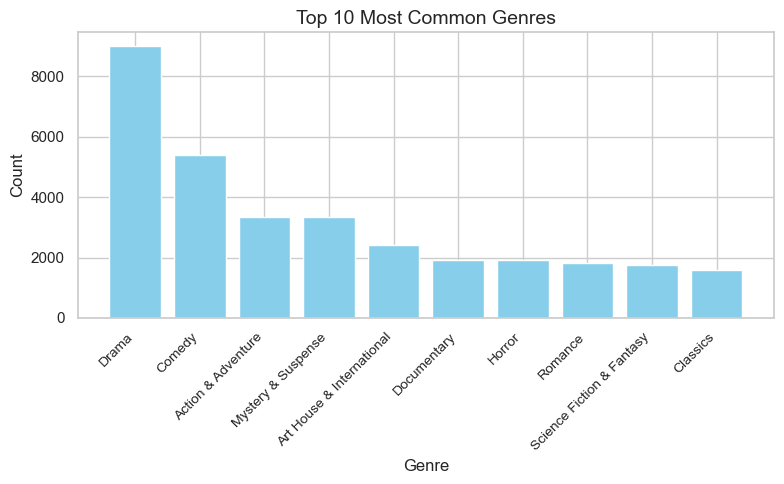

In [317]:
# Flatten and count genres
all_genres = df['genre'].dropna().apply(lambda x: x.split(', '))
genre_flat = [g.strip() for sublist in all_genres for g in sublist]
genre_counts = Counter(genre_flat)
top_genres = genre_counts.most_common(10)

# Plot bar chart
plt.figure(figsize=(8,5))
plt.bar(*zip(*top_genres), color='skyblue')
plt.title('Top 10 Most Common Genres', fontsize=14)
plt.xlabel('Genre', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()
plt.show()

**2. Scatter Plot – Rating vs. Plot Length**

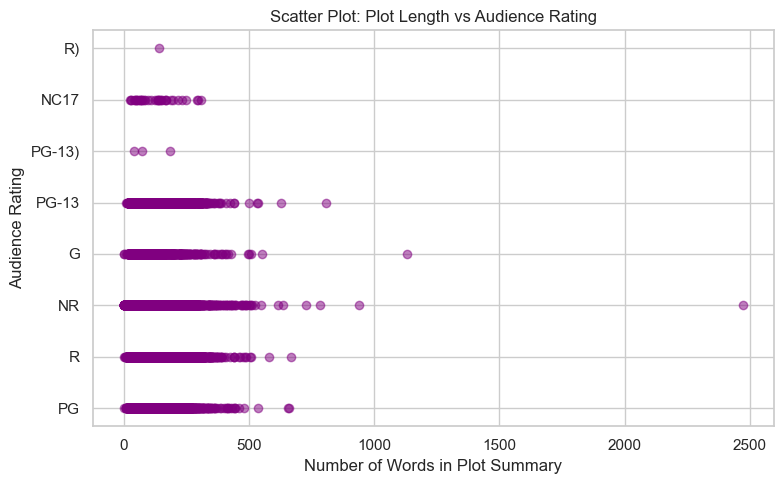

In [320]:
# Create a new column for plot summary length
df['plot_length'] = df['movie_info'].apply(lambda x: len(str(x).split()) if x != 'N.A' else 0)

# Plot scatter: rating vs plot length
plt.figure(figsize=(8,5))
plt.scatter(df['plot_length'], df['rating'], alpha=0.5, color='purple')
plt.title('Scatter Plot: Plot Length vs Audience Rating')
plt.xlabel('Number of Words in Plot Summary')
plt.ylabel('Audience Rating')
plt.grid(True)
plt.tight_layout()
plt.show()

**3. Box Plot – Outliers in Plot Summary Length**

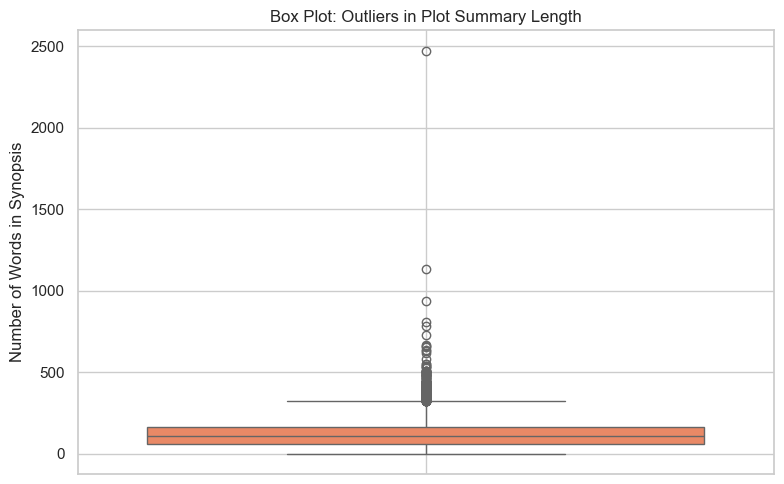

In [323]:
plt.figure(figsize=(8,5))
sns.boxplot(y=df['plot_length'], color='coral')
plt.title('Box Plot: Outliers in Plot Summary Length')
plt.ylabel('Number of Words in Synopsis')
plt.grid(True)
plt.tight_layout()
plt.show()

**4. Pie Chart: Distribution of Top 5 Movie Ratings**

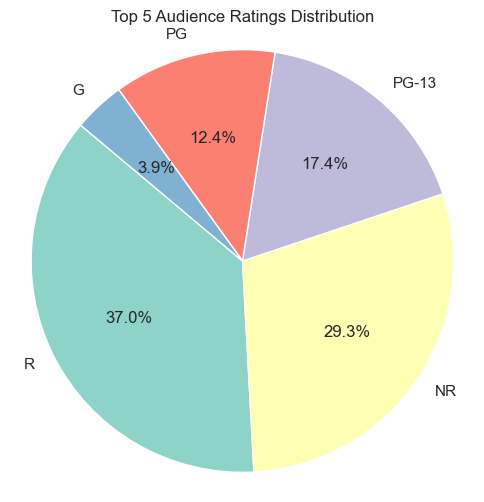

In [326]:
rating_counts = df['rating'].value_counts().head(5)

# Plot
plt.figure(figsize=(6,6))
plt.pie(rating_counts, labels=rating_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Set3.colors)
plt.title('Top 5 Audience Ratings Distribution')
plt.axis('equal')
plt.show()

**5. Bar Chart – Top 10 Most Frequent Directors**

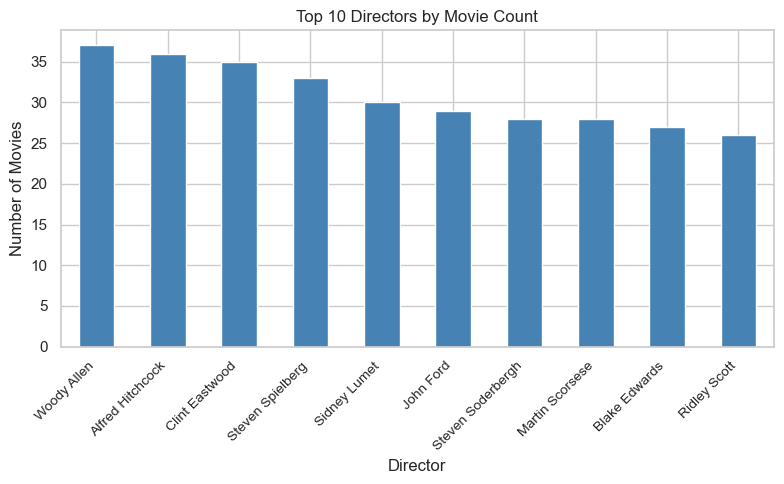

In [329]:
director_counts = df['directors'].dropna().str.split(', ').explode().value_counts().head(10)

plt.figure(figsize=(8,5))
director_counts.plot(kind='bar', color='steelblue')
plt.title('Top 10 Directors by Movie Count')
plt.xlabel('Director')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()
plt.show()

In [331]:
# Set consistent style for seaborn
import seaborn as sns
sns.set(style="whitegrid")

# Numeric summary (only rating here)
numeric_summary = df_cleaned.describe()

# Unique values in categorical columns
categorical_columns = df_cleaned.select_dtypes(include='object').columns
unique_values = {col: df[col].nunique() for col in categorical_columns}

# Output
numeric_summary, unique_values

(       movie_title movie_info rating  genre directors   cast
 count        16637      16637  16637  16637     16637  16637
 unique       16106      16614      8   1081      8315  16327
 top           Home        N.A      R  Drama       N.A    N.A
 freq             5         24   6136   1726       114    284,
 {'movie_title': 16106,
  'movie_info': 16613,
  'rating': 8,
  'genre': 1080,
  'directors': 8314,
  'cast': 16326})

**1. Countplot – Top 10 Genres**

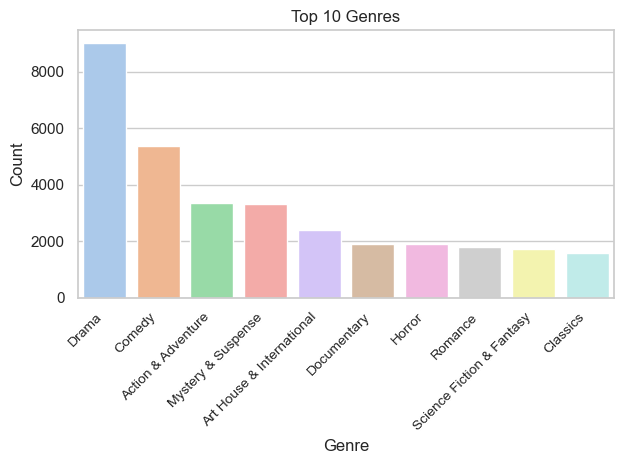

In [334]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
top_genres_df = df_cleaned['genre'].str.split(', ').explode().value_counts().head(10).reset_index()
top_genres_df.columns = ['Genre', 'Count']

sns.barplot(data=top_genres_df, x='Genre', y='Count', palette='pastel')
plt.title('Top 10 Genres')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()
plt.show()

 **2. Countplot – Top 10 Directors**

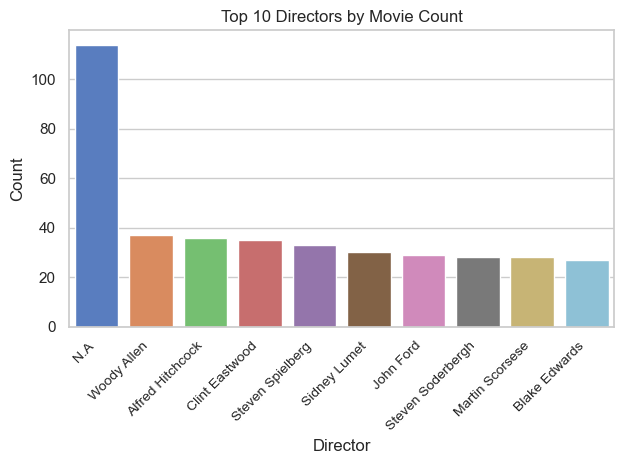

In [337]:
top_directors = df_cleaned['directors'].str.split(', ').explode().value_counts().head(10).reset_index()
top_directors.columns = ['Director', 'Count']

sns.barplot(data=top_directors, x='Director', y='Count', palette='muted')
plt.title('Top 10 Directors by Movie Count')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()
plt.show()

**3. Countplot – Top 10 Actors**

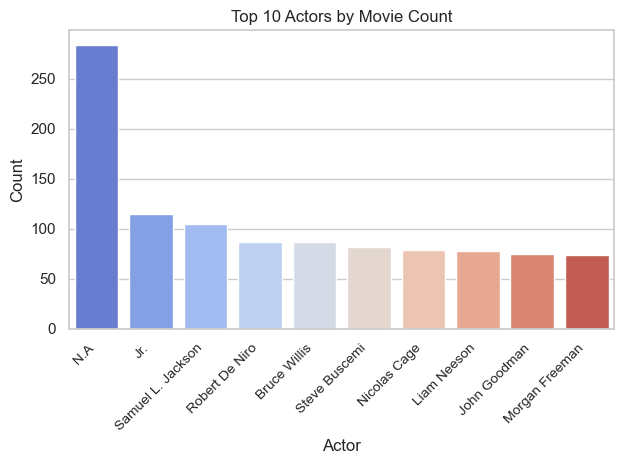

In [340]:
top_actors = df_cleaned['cast'].str.split(', ').explode().value_counts().head(10).reset_index()
top_actors.columns = ['Actor', 'Count']

sns.barplot(data=top_actors, x='Actor', y='Count', palette='coolwarm')
plt.title('Top 10 Actors by Movie Count')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()
plt.show()

# **Outlier treatment using IQR**

In [343]:
# Step 1: Create a plot_length column
df_cleaned['plot_length'] = df_cleaned['movie_info'].apply(lambda x: len(str(x).split()))

# Step 2: Calculate IQR and cap
Q1 = df_cleaned['plot_length'].quantile(0.25)
Q3 = df_cleaned['plot_length'].quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR

# Step 3: Apply cap to the plot summary
def cap_plot_length(text, max_words):
    words = str(text).split()
    if len(words) > max_words:
        return ' '.join(words[:int(max_words)])
    return text

df_cleaned['movie_info'] = df_cleaned['movie_info'].apply(lambda x: cap_plot_length(x, upper_bound))

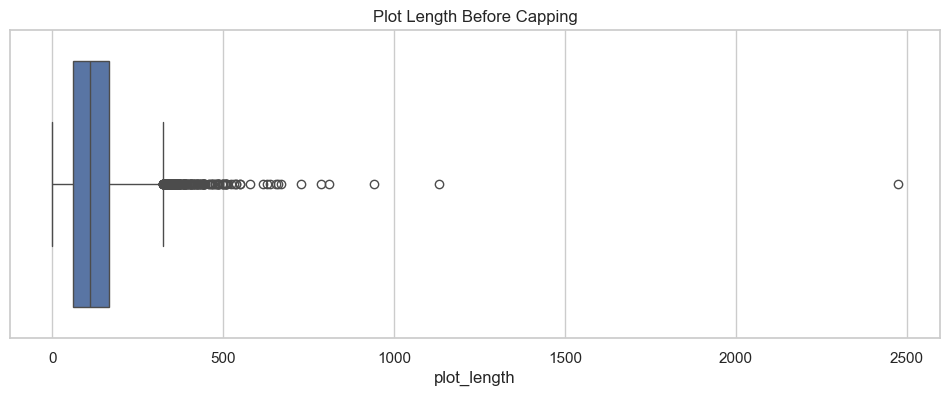

In [344]:
# Before capping
plt.figure(figsize=(12, 4))
sns.boxplot(x=df_cleaned['plot_length'])
plt.title("Plot Length Before Capping")
plt.show()

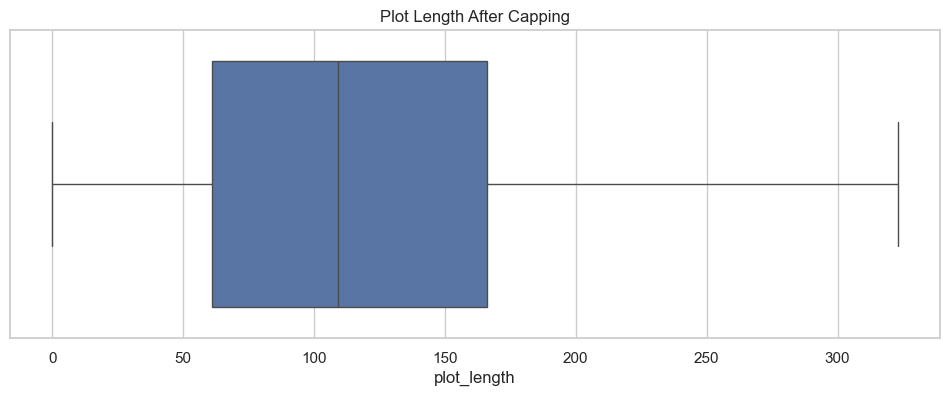

In [346]:
# After capping
df_cleaned['plot_length'] = df_cleaned['movie_info'].apply(lambda x: len(str(x).split()))
plt.figure(figsize=(12, 4))
sns.boxplot(x=df_cleaned['plot_length'])
plt.title("Plot Length After Capping")
plt.show()

# **Feature Engineering**  

**Step 1. TF-IDF Vectorization of Plot**

In [351]:
from sklearn.feature_extraction.text import TfidfVectorizer

# TF-IDF for 'movie_info'
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(df_cleaned['movie_info'])

print("TF-IDF Matrix shape:", tfidf_matrix.shape)

TF-IDF Matrix shape: (16637, 62544)


**Step 2: Multi-hot Encode genre**

In [354]:
from sklearn.preprocessing import MultiLabelBinarizer

# Split genre into list
df_cleaned['genre_list'] = df_cleaned['genre'].apply(lambda x: x.split(', ') if x != 'N.A' else [])

# Fit and transform
mlb_genre = MultiLabelBinarizer()
genre_matrix = mlb_genre.fit_transform(df_cleaned['genre_list'])

print("Genre Matrix shape:", genre_matrix.shape)

Genre Matrix shape: (16637, 21)


**Step 3: Multi-hot Encode Top Actors from cast**

In [357]:
# Extract top 50 actors
from collections import Counter

actor_series = df_cleaned['cast'].apply(lambda x: x.split(', ') if x != 'N.A' else [])
flat_actor_list = [actor for sublist in actor_series for actor in sublist]
top_actors = [a for a, c in Counter(flat_actor_list).most_common(50)]

# Convert to actor presence matrix
def encode_cast(cast_list):
    return [1 if actor in cast_list else 0 for actor in top_actors]

cast_matrix = actor_series.apply(encode_cast)
import numpy as np
cast_matrix = np.array(cast_matrix.tolist())

print("Cast Matrix shape:", cast_matrix.shape)

Cast Matrix shape: (16637, 50)


**Step 4: Combine All Vectors into a Unified Matrix**

In [360]:
from scipy.sparse import hstack

# Combine TF-IDF (sparse), genre (dense), and cast (dense)
from scipy.sparse import csr_matrix

combined_matrix = hstack([
    tfidf_matrix, 
    csr_matrix(genre_matrix), 
    csr_matrix(cast_matrix)
])

print("Combined Content Matrix shape:", combined_matrix.shape)

Combined Content Matrix shape: (16637, 62615)


**Step 5: Compute Cosine Similarity**

In [363]:
from sklearn.metrics.pairwise import cosine_similarity

# Compute similarity matrix
cosine_sim = cosine_similarity(combined_matrix, combined_matrix)

# Check shape
print("Cosine Similarity Matrix shape:", cosine_sim.shape)

Cosine Similarity Matrix shape: (16637, 16637)


**Step 6: Build Recommendation Function**

In [366]:
from difflib import get_close_matches

def recommend_movies(title, top_n=5):
    title_lower = title.lower()
    titles_lower = df_cleaned['movie_title'].str.lower()

    if title_lower not in titles_lower.values:
        suggestion = get_close_matches(title_lower, titles_lower.tolist(), n=1)
        if suggestion:
            return f"Movie not found. Did you mean: {suggestion[0]}?"
        return f"Movie '{title}' not found in the dataset."
    
    idx = titles_lower[titles_lower == title_lower].index[0]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)[1:top_n+1]
    movie_indices = [i[0] for i in sim_scores]
    return df_cleaned['movie_title'].iloc[movie_indices].tolist()

# **Movie Reccomendation Engine**

**Please enter the Movie name in the input box.**

In [ ]:
while True:
    movie_title = input("Enter a movie title: ")
    recommendations = recommend_movies(movie_title, top_n=5)

    # Case 1: Movie found
    if isinstance(recommendations, list):
        print(f"\nTop recommendations for '{movie_title}':")
        for i, rec in enumerate(recommendations, 1):
            print(f"{i}. {rec}")

    # Case 2: Movie not found, but suggestion offered
    elif "Did you mean:" in recommendations:
        print(recommendations)
        suggested_title = recommendations.split("Did you mean:")[1].strip().strip("?")
        choice = input(f"Do you want to search for '{suggested_title}' instead? (yes/no): ").strip().lower()

        if choice == "yes":
            corrected_recommendations = recommend_movies(suggested_title, top_n=5)
            print(f"\nTop recommendations for '{suggested_title}':")
            for i, rec in enumerate(corrected_recommendations, 1):
                print(f"{i}. {rec}")
        else:
            print("No recommendations shown.")

    # Case 3: Movie not found at all
    else:
        print(recommendations)

    # Ask to search again
    again = input("\nDo you want to search for another movie? (yes/no): ").strip().lower()
    if again != "yes":
        print("Thank you for using the movie recommender!")
        break

# **Insights from Visualizations**

During the exploratory data analysis (EDA), several visualizations were created to uncover patterns and trends in the dataset. Below are the key insights derived from the charts:

**Genre Distribution**
A bar and pie chart of the genre column revealed that Drama, Comedy, and Action were the most frequent genres. This indicates a production and viewer preference leaning toward emotional storytelling and entertainment-heavy content.

**Top Directors and Cast Members**
From the bar charts, we observed that a few directors and actors appeared multiple times across the dataset, suggesting their dominance or popularity in the industry. However, the majority of directors and cast entries appeared only once, showing a wide variety of talent in the dataset.

**Rating Spread**
The rating distribution was mostly skewed toward mid-to-high values, with few very low ratings. This indicates that most movies included in the dataset are of generally acceptable or favorable quality, possibly due to selection bias.

**Outliers in Plot Length**
A boxplot of plot summary lengths showed a number of outliers—very lengthy plots that could distort vectorization and recommendation quality. These were successfully capped using the IQR method to maintain uniformity across movie profiles.

**Missing Value Insights**
The dataset had missing values especially in columns like writers and cast. While movie_title, genre, and rating were mostly complete, the sparsity in writer/cast information highlighted the importance of proper metadata collection in real-world applications.

These insights helped shape the data cleaning strategy and informed how features like genre, cast, and plot were handled during preprocessing and recommendation building.

# **Conclusion**

In this project, we developed a content-based movie recommendation system using the Rotten Tomatoes Movies Dataset. Unlike traditional supervised learning tasks covered in this course, this project focused on unsupervised learning techniques, which enabled us to recommend movies by analyzing similarities in plot, genre, and cast.

The workflow involved:
1. Data cleaning and preprocessing
2. Feature extraction through TF-IDF vectorization for plot summaries
3. Multi-hot encoding for genres and top actors
4. Creating a unified content profile for each movie
5. Using cosine similarity to compute closeness between movies

Once the similarity matrix was created, a recommendation function was built to return the top-N similar movies to a given input. This mimics how platforms like Netflix and Prime Video help users discover related content.

The system was further enhanced by:
1. A user input feature with typo handling (via fuzzy matching)
2. Genre display alongside recommendations for better interpretability
3. A looped recommendation interface for interactive use

Although the course primarily covered supervised techniques like regression and classification, this project demonstrates how unsupervised, content-based filtering can also be powerful and practical for solving real-world problems.

# **Limitations**
While the project successfully demonstrates a functional content-based recommendation system, it does have several limitations:
1. Cold Start Problem: Since the system relies solely on content features, it cannot recommend newly added movies with minimal or missing metadata (e.g., no plot, genre, or cast listed).
2. No User Personalization: The system does not consider user preferences, watch history, or behavior, which limits its ability to tailor results to individual users.
3. Limited Text Representation: Plot summaries are vectorized using TF-IDF, which does not capture the deep semantics or context of the storyline. This can lead to less meaningful similarity in some cases.
4. Static Similarity Matrix: Cosine similarity is precomputed for all movies, which is memory-intensive and not scalable for very large datasets without optimization.
5. Exact Title Matching (without fuzzy logic): Even with fuzzy matching added, if the input title is too ambiguous or uncommon, the system may not provide useful recommendations.
6. Bias Toward Popular Genres/Actors: Since we only encoded the top 50 actors, lesser-known or niche movies may not receive high similarity scores even if they're relevant.

# **Future Work**

While the current system effectively recommends similar movies based on plot, genre, and cast information, there are several opportunities to improve and expand the recommendation engine:
1. Better Plot Understanding with Deep NLP: Currently, the system uses TF-IDF for text representation. Future versions could incorporate advanced models like BERT or sentence transformers for deeper semantic understanding of plot summaries.
2. Hybrid Recommendation System: The project can be extended to include collaborative filtering techniques, combining user preferences and viewing history with content similarity for more personalized results.
3. User Profile Integration: Currently, the model only considers movie content. Future iterations could include user feedback, watch history, or ratings to fine-tune the recommendations.
4. Web-Based Deployment: The system can be deployed using Streamlit or Flask, allowing users to search and get recommendations through a simple web interface.
5. Similarity Explanation: Incorporating an explanation of why a recommendation was made (e.g., "Recommended because it shares the same genre and lead actor") could improve transparency and trust in the system.
6. Performance Optimization: With over 16,000 movies, computing cosine similarity becomes memory-intensive. Future work could include dimensionality reduction or approximate nearest neighbor methods for faster recommendations.